In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [7]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [8]:
df['label'] = df['label'].map(labels_map)
temp = df.copy()
df.head() 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [11]:

print(X_train.shape)  
print(y_train.shape)  

print(X_test.shape)   
print(y_test.shape)   


(1760, 7)
(1760,)
(440, 7)
(440,)


In [12]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

### ML ALGO 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [14]:
# Import XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier
# Re-map the target variables so that they start at 0
y_train = y_train - 1
y_test = y_test - 1

# Now, initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=22,  # Update this to 22 because there are now 22 classes: 0 through 21
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")



XGBoost Accuracy: 0.9955


In [15]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.to_csv('X_train_scaled.csv', index=False)
X_train_df.head()


,N,P,K,temperature,humidity,ph,rainfall
0,0.492857,0.328571,0.090,0.384269,0.683551,0.512708,0.310615
1,0.428571,0.450000,0.390,0.295410,0.048723,0.484601,0.234797
2,0.250000,0.492857,0.085,0.513556,0.568224,0.527834,0.081460
3,0.492857,0.357143,0.165,0.398371,0.797694,0.341514,0.902667
4,0.107143,0.064286,0.015,0.034007,0.886171,0.422402,0.356528


In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize the classifiers

# Random Forest Classifier
rf = RandomForestClassifier(
    ccp_alpha=0.02,
    max_depth=2,
    min_samples_leaf=12,
    min_samples_split=2,
    n_estimators=100
)

# Logistic Regression
lr = LogisticRegression(max_iter=194)

# Support Vector Classifier
svc = SVC(C=0.5, kernel="poly", max_iter=139)

# XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,         # Number of trees (boosting rounds)
    max_depth=5,              # Maximum depth of each tree
    learning_rate=0.1,        # Learning rate (shrinkage factor)
    subsample=0.8,            # Fraction of samples to be used for each tree
    colsample_bytree=0.8,     # Fraction of features used for each tree
    objective='multi:softmax',# Objective for multiclass classification (using softmax)
    num_class=22,             # Number of classes (ensure your labels are mapped from 0 to 21)
    random_state=42
)

# Evaluate each model using 20-fold cross-validation
rf_val = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)
lr_val = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)
svc_val = cross_val_score(estimator=svc, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)
xgb_val = cross_val_score(estimator=xgb_model, X=X_train_scaled, y=y_train, cv=20, n_jobs=-1)

# Print the average accuracy for each model
print(f"Random Forest CV Accuracy: {rf_val.mean():.4f}")
print(f"Logistic Regression CV Accuracy: {lr_val.mean():.4f}")
print(f"SVC CV Accuracy: {svc_val.mean():.4f}")
print(f"XGBoost CV Accuracy: {xgb_val.mean():.4f}")


Random Forest CV Accuracy: 0.8330
Logistic Regression CV Accuracy: 0.9420
SVC CV Accuracy: 0.9881
XGBoost CV Accuracy: 0.9938


 Model : rf gave 0.8329545454545455 accuracy
 Model : lr gave 0.9420454545454546 accuracy
 Model : svc gave 0.9880681818181818 accuracy
 Model : xgb_model gave 0.99375 accuracy


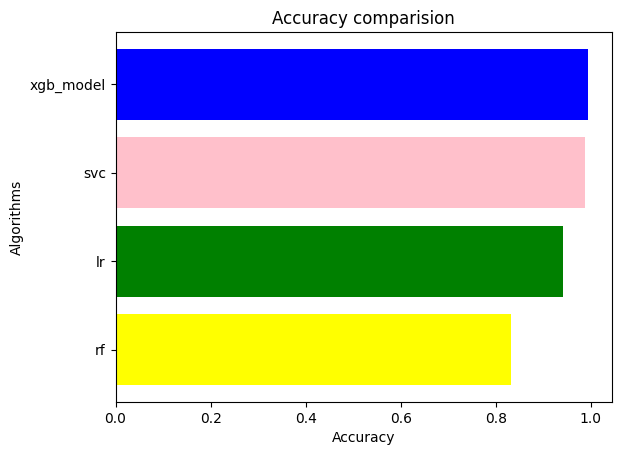

In [17]:

score_list = [rf_val,lr_val,svc_val,xgb_val]
model_name = ['rf','lr','svc','xgb_model']
x_axis=[]
for i,j in zip(score_list,model_name):
    x_axis.append(i.mean())
    print(f' Model : {j} gave {i.mean()} accuracy')
m=np.array(x_axis)
n=np.array(model_name)
plt.title("Accuracy comparision")
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.barh(n,m,color=['yellow','green','pink','blue'])
plt.show()

In [18]:
from sklearn import metrics

In [19]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

0.9869318181818182

In [ ]:
rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=2, min_samples_leaf=12,
                       min_samples_split=2, n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8255681818181818

In [21]:
# svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.9789772727272728

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,         # Number of trees (boosting rounds)
    max_depth=5,              # Maximum depth of each tree
    learning_rate=0.1,        # Learning rate (shrinkage factor)
    subsample=0.8,            # Fraction of samples to be used for each tree
    colsample_bytree=0.8,     # Fraction of features used for each tree
    objective='multi:softmax',# Objective for multiclass classification using softmax
    num_class=22,             # Number of classes (ensure your labels are mapped from 0 to 21)
    random_state=42           # Random seed for reproducibility
)

# Train the XGBoost model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)
# Get the training accuracy
xgb_accuracy = xgb_model.score(X_train_scaled, y_train)
print(f"XGBoost Training Accuracy: {xgb_accuracy:.4f}")


XGBoost Training Accuracy: 1.0000


In [23]:

xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)


1.0

In [24]:
train.shape,temp.shape

((2200, 7), (2200, 8))

In [25]:
# 1st Prediction Data (Expected label 21: jute)
data1 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])  # Input features for prediction
prediction1 = xgb_model.predict(data1)  # Predict using XGBoost model
pred1 = prediction1[0]  # Get the first prediction result

# Map the numeric prediction back to the crop name
pred1 = list(labels_map.keys())[list(labels_map.values()).index(pred1)]
print(pred1)  # Should print 'jute' if prediction is correct

# 2nd Prediction Data
data2 = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])  # Input features for prediction
prediction2 = xgb_model.predict(data2)
pred2 = prediction2[0]

# Map the numeric prediction back to the crop name
pred2 = list(labels_map.keys())[list(labels_map.values()).index(pred2)]
print(pred2)

cotton
jute


In [ ]:
# Example known data
sample_data = np.array([[71, 54, 16, 22, 63, 5.7, 87]])  
prediction = xgb_model.predict(sample_data)
predicted_crop = labels[prediction[0]]
print(f"Predicted Crop: {predicted_crop}")


Predicted Crop: maize


## Saving the Model

In [27]:
import pickle
file = open('mainmodel3.pkl','wb')
pickle.dump(xgb_model,file)
file.close()
